# Relacion entre manaties y licencias de motos

## Cargamos las librerías

In [2]:
#Esto es un manati
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Muestra

In [4]:
data="""1996 x1 = 447 y1 = 13
1997 x2 = 460 y2 = 21
1998 x3 = 481 y3 = 24
1999 x4 = 498 y4 = 16
2000 x5 = 513 y5 = 24
2001 x6 = 512 y6 = 20
2002 x7 = 526 y7 = 15
2003 x8 = 559 y8 = 34
2004 x8 = 585 y9 = 33
2005 x10 = 614 y10 = 33
2006 x11 = 645 y11 = 39
2007 x12 = 675 y12 = 43
2008 x13 = 711 y13 = 50
2009 x14 = 719 y14 = 47"""

## Cargamos los datos X e Y

In [9]:
x=[]
y=[]
for linea in data.split("\n"):
    reg=linea.split()
    x.append(int(reg[3]))
    y.append(int(reg[6]))

x=np.array(x)
y=np.array(y)

array([13, 21, 24, 16, 24, 20, 15, 34, 33, 33, 39, 43, 50, 47])

## Mostramos relación

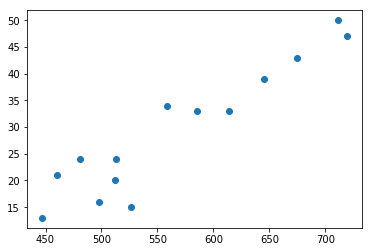

In [11]:
plt.scatter(x,y)
plt.show()

## Calculo directo de u y v

### A mano

In [12]:
#Calculamos la covarianza
cov=np.mean((x-np.mean(x))*(y-np.mean(y)))
cov

979.35714285714289

In [13]:
#Calculamos los coeficientes:
vx = np.var(x)
vx

7843.5357142857147

In [14]:
u = np.mean(y)-np.mean(x)*cov/vx
v = cov/vx
print u
print v

-41.4304389485
0.124861692294


In [15]:
# Pongamoslo en forma de funcion
def error(u,v):
    yp = u+x*v
    return np.mean((y-yp)**2)

In [16]:
#Calculamos el error
error(u,v)

15.674993455735168

In [18]:
#El paquete numpy permite calcular la covarianza pero debemos especificarlo CON bias
np.cov(x,y,bias=True)

array([[ 7843.53571429,   979.35714286],
       [  979.35714286,   137.95918367]])

In [19]:
cov=np.cov(x,y,bias=True)[0][1]
cov

979.35714285714278

### Libreria de Python

In [22]:
# Se puede usar directamente scipy para calcular los coeficientes de la recta
from scipy import stats
stats.linregress(x,y)

LinregressResult(slope=0.12486169229438254, intercept=-41.430438948490661, rvalue=0.94147728878930559, pvalue=5.1090611434299932e-07, stderr=0.012904973642921345)

In [23]:
u=-41.430438948490661
v=0.12486169229438254
yp = u+x*v

yp

array([ 14.38273751,  16.00593951,  18.62803505,  20.75068381,
        22.6236092 ,  22.49874751,  24.2468112 ,  28.36724704,
        31.61365104,  35.23464012,  39.10535258,  42.85120335,
        47.34622427,  48.34511781])

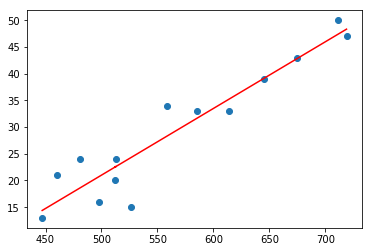

In [25]:
plt.scatter(x,y)
plt.plot(x, yp, color="red")
plt.show()